# Matplotlib

This notebook is for working through the various [tutorials](https://matplotlib.org/tutorials/index.html) offered by on the `matplotlib` website.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import FuncFormatter
import pathlib

np.random.seed(0)

%matplotlib inline

assets_path = pathlib.Path('assets', 'Matplotlib-tutorial')
save_path = pathlib.Path('output', 'Matplotlib-tutorial')

## Usage guide ([link](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

### General concepts

Matplotlib is organized as a hierarchy.
The top is the matplotlib "state-machine environment" which is in the `matplotlib.pyplot` module.
At this level, simple functions are used to add standard plot elements to the current axes in the current figure.

The next level is the first level of the OO interface.
Here, the user can create figure and axes objects.

### Parts  of a figure

#### Figure

This is the **whole** figure.
It keeps track of the child axes, some special *artists* (eg. titles, figure legends) and the *canvas* (this is what actually "draws" the figure but is rarely explicitly addressed by a user).
A figure can have any number of `Axes`, but should have at least one.

The easiest way to make a new figure  is with pyplot.

<Figure size 432x288 with 0 Axes>

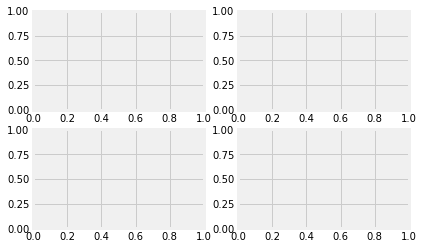

In [153]:
fig = plt.figure()
fig.suptitle('No  axes in this figure')
fig, ax_lst = plt.subplots(2, 2)

#### Axes

This is the region where the data is visualized and is the primary point of entry for the OO interface.
A given `Axes` object can only be in one `Figure`.
The Axes contains two (or three for 3D plots) `Axis` objects which take care of the data limits.
Each `Axes` has a title, set via `set_title()`, and x- and y-labels, set via `set_xlabel()` and `set_ylabel()`.

#### Axis

These are the number-line-like objects.
They take care of setting the graph limits and generating ticks and tick-labels.

#### Artist

Basically, everything that can be seen on the figure is an artist.
When the figure is rendered, the artists are drawn to the canvas.
Most artists are tied to an Axes.

###  Types of inputs to plotting functions

All plotting functions expect a `np.array` or `np.ma.masked_array` as input.

### Coding styles

There are multiple coding styles for using matplotlib, two of which are officially supported.
They are all valid, but it is important to not mix them up in a single figure.

Here is what the "pyplot" style looks like.

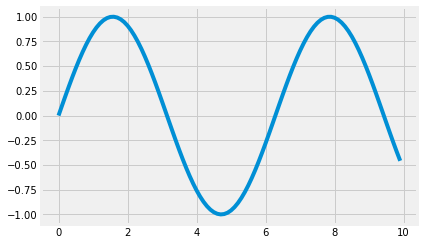

In [154]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

This method is good for creating plots using a function because it makes creating complicated subplots as easy as passing the desired axes.

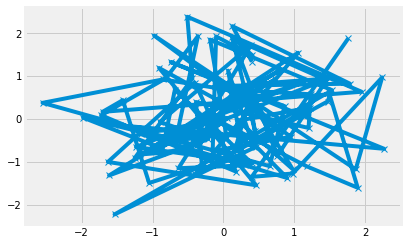

In [155]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a plot.
    Parameters
    ----------
    ax : Axes
        The axes to draw to.

    data1 : array
        The `x` data.

    data2 : array
        The `y` data.

    param_dict : dict
        Dictionary of kwargs to pass to ax.plot.

    Returns
    -------
    out : list
        A list of artists added to the axes.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out


x1, x2 = np.random.randn(2, 100)

fig, ax = plt.subplots(1, 1)
my_plotter(ax, x1, x2, {'marker': 'x'})
plt.show()

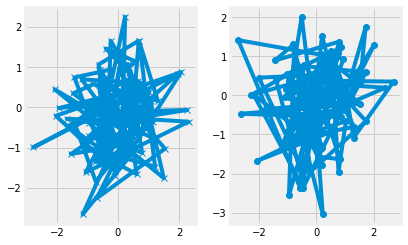

In [156]:
x1, x2, x3, x4 = np.random.randn(4, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, x1, x2, {'marker': 'x'})
my_plotter(ax2, x3, x4, {'marker': 'o'})
plt.show()

## Pyplot tutorial ([link](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py))

### Intro to pyplot

`matplotlib.pyplot` is a collection of command style functions that each changes the figure.

Generating a plot is very easy.

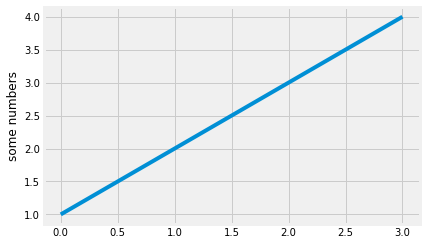

In [157]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

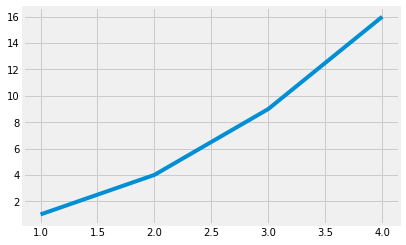

In [158]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

#### Formatting the style of your plot

There is an optional third positional argument to `plot()` that accepts a string dictating the style of the line and marker.
The defualt is `'b-'` for a solid blue line.
Here is how to use `ro` to creating red circles.
The `axis()` function sets the x- and y-axis limits.

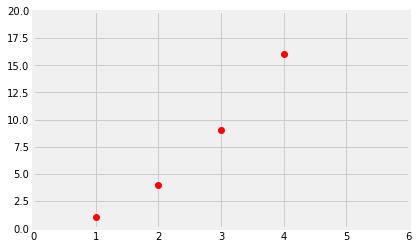

In [159]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

It is also possible to specify multiple data to plot at once.

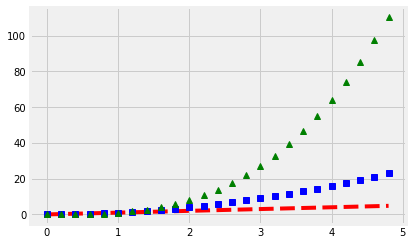

In [160]:
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Plotting with keyword strings

There are times where to data structure allows specification of particular plotting variables using strings.
A common example is a `pandas.DataFrame`.

In [161]:
data = pd.DataFrame(
    {
        'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.abs(np.random.randn(50)) * 100
    }
)
data['b'] = data.a + 10 * np.random.randn(50)
data.head()

,a,c,d,b
0,0,4,82.346757,2.122954
1,1,17,127.974266,1.774748
2,2,3,19.533102,-2.338056
3,3,37,78.674108,1.692074
4,4,30,78.160973,3.637900


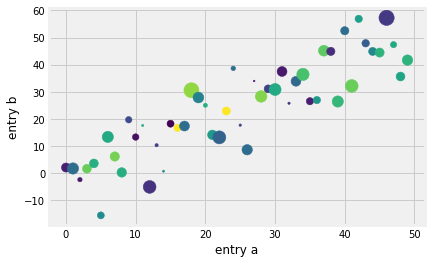

In [162]:
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables

Many plotting functions in matplotlib take categorical variables.

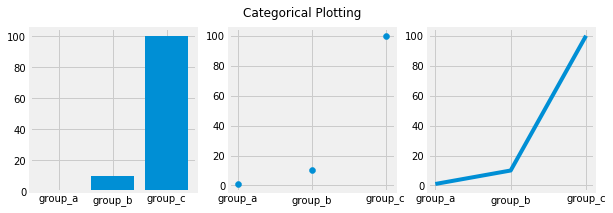

In [163]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

### Controlling line properties

Lines have many attributes that can be set: (e.g. linewidth, dash style, antialiased).
Further, there are multiple ways to set these attributes.
One is with keyword arguments.

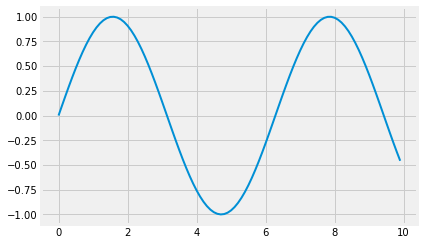

In [164]:
plt.plot(x, y, linewidth=2.0)
plt.show()

Another is with setter methods on the line objects.
The `plt.plot()` function returns a list of `Line2D` objects.
The example below is of only one line, so it is indexed to extract the `Line2D` object from the list.

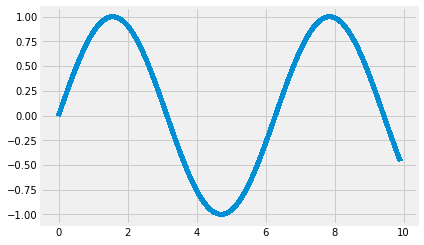

In [165]:
line = plt.plot(x, y, '-')[0]
line.set_antialiased(False)
plt.show()

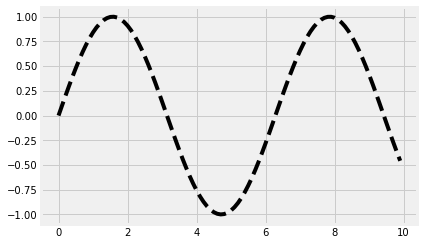

In [166]:
line = plt.plot(x, y,
                color='k',
                linestyle='--',
                label='example line',
                dash_capstyle='butt')

### Working with multiple figures and axes

Pyplot has the concept of the *current figure* and the *current axes*.
All plotting commands apply to the current axes.
The function `gca()` returns the current `Axes` object and `gcf()` returns the current `Figure` object.
Normally, you need not worry about this because it happens automatically  behind the scenes.

Below is an example of a figure with two subplots.

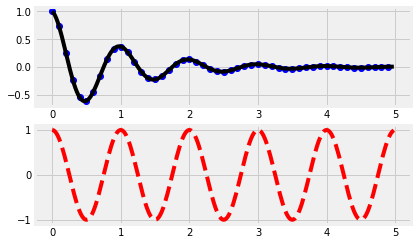

In [167]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.show()

Note that the memory required for a figure is not fully released until `plt.close()` is called.

### Working with text

The `text()` command can add arbitrary text to a plot.
It returns a `Text` object that can be customized further (see the [Text properties and layout](https://matplotlib.org/tutorials/text/text_props.html) documentation).

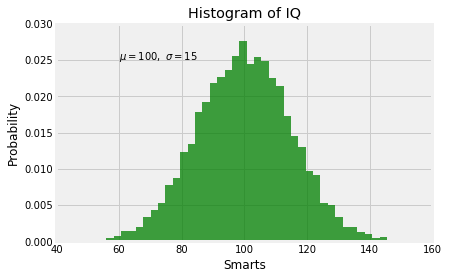

In [168]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, 0.025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()
plt.close()

#### Annotating text

The `annotate()` command adds a tet and arrow to a plot.
There are [Basic](https://matplotlib.org/tutorials/text/annotations.html#annotations-tutorial) and [Advanced Annotation](https://matplotlib.org/tutorials/text/annotations.html#plotting-guide-annotation) tutorials available.

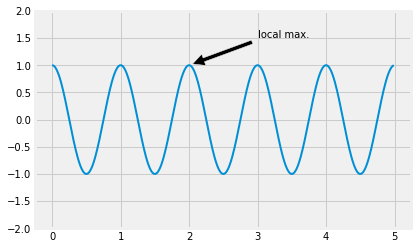

In [169]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.annotate('local max.', 
             xy=(2, 1), 
             xytext=(3, 1.5), 
             arrowprops={'facecolor': 'k', 'shrink': 0.05})
plt.ylim(-2, 2)
plt.show()
plt.close()

### Logarithmic and other nonlinear axes

To change the scale of the x-axis to logarithmic, use `plt.xscale('log')`.
Some common options are `'linear'` (default), `'log'`, `'symlog'` (symmetric log), and `'logit''`.

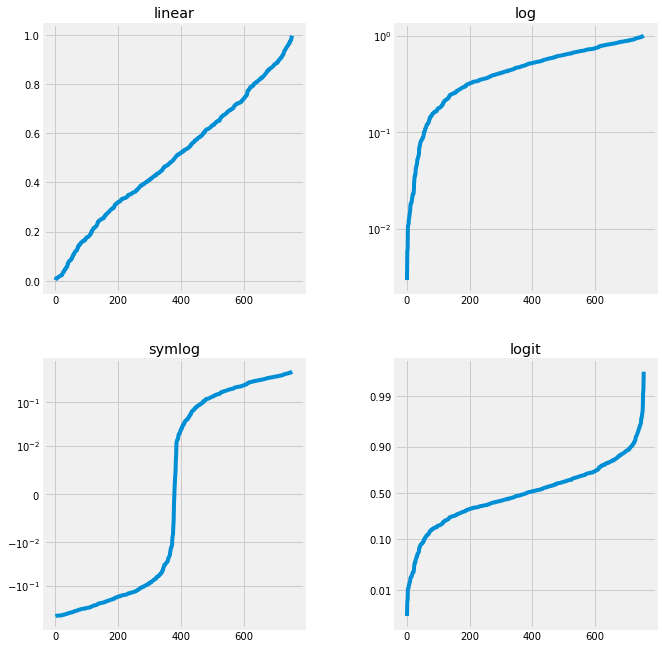

In [170]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# make up some data in the interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(10, 10))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()
plt.close()

## Sample plots in Matplotlib ([link](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py))

This is not a tutorial, but instead there is a gallery of example plots with their source code.
I decided to just try plotting a few of them.

[**Contouring and pseudocolor**](https://matplotlib.org/gallery/images_contours_and_fields/pcolormesh_levels.html)

In [171]:
import matplotlib
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

dx, dy = 0.05, 0.05
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

In [172]:
y

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.05, 1.05, 1.05, ..., 1.05, 1.05, 1.05],
       [1.1 , 1.1 , 1.1 , ..., 1.1 , 1.1 , 1.1 ],
       ...,
       [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ],
       [4.95, 4.95, 4.95, ..., 4.95, 4.95, 4.95],
       [5.  , 5.  , 5.  , ..., 5.  , 5.  , 5.  ]])

In [173]:
x

array([[1.  , 1.05, 1.1 , ..., 4.9 , 4.95, 5.  ],
       [1.  , 1.05, 1.1 , ..., 4.9 , 4.95, 5.  ],
       [1.  , 1.05, 1.1 , ..., 4.9 , 4.95, 5.  ],
       ...,
       [1.  , 1.05, 1.1 , ..., 4.9 , 4.95, 5.  ],
       [1.  , 1.05, 1.1 , ..., 4.9 , 4.95, 5.  ],
       [1.  , 1.05, 1.1 , ..., 4.9 , 4.95, 5.  ]])

In [174]:
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
z

array([[ 0.18037951,  0.26823017,  0.36335424, ...,  0.70887839,
         0.58107739,  0.44192559],
       [ 0.20738012,  0.2942647 ,  0.38808212, ...,  0.68002396,
         0.54664565,  0.40298815],
       [ 0.23430727,  0.3201529 ,  0.41259223, ...,  0.66058997,
         0.5247303 ,  0.37987008],
       ...,
       [-0.19534556, -0.17962168, -0.11478605, ...,  0.67850552,
         0.52732772,  0.37422725],
       [-0.21439958, -0.19297694, -0.12193009, ...,  0.65971059,
         0.51699498,  0.37899662],
       [-0.23247283, -0.20513588, -0.12774952, ...,  0.65154933,
         0.52098567,  0.40107702]])

In [175]:
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
levels

array([-1.05, -0.9 , -0.75, -0.6 , -0.45, -0.3 , -0.15,  0.  ,  0.15,
        0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ])

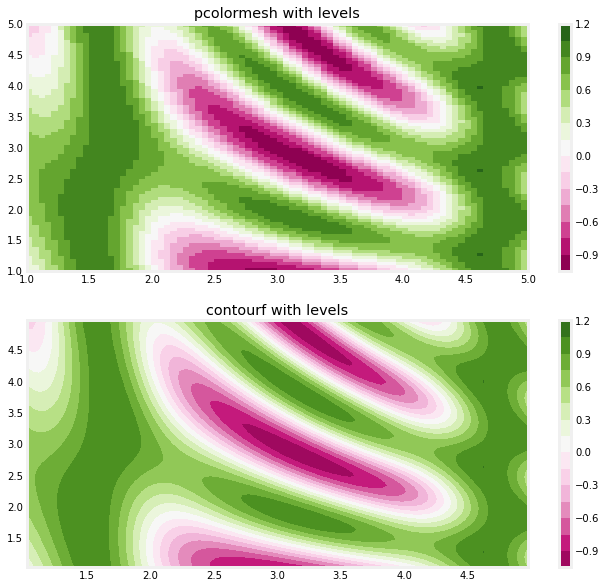

In [176]:
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig = plt.figure(figsize=(10, 10))
fig.tight_layout()

ax0 = plt.subplot(211)
im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

ax1 = plt.subplot(212)
cf = ax1.contourf(x[:-1, :-1] + dx/2.0,
                  y[:-1, :-1] + dy/2.0,
                  z, levels=levels, cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

plt.show()
plt.close()

[**3D surface (color map)**](https://matplotlib.org/gallery/mplot3d/surface3d.html)

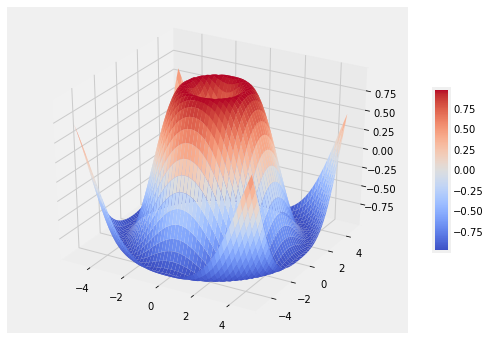

In [177]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()
plt.close()

[**Demo of the histogram (hist) function with a few features**](https://matplotlib.org/gallery/statistics/histogram_features.html)

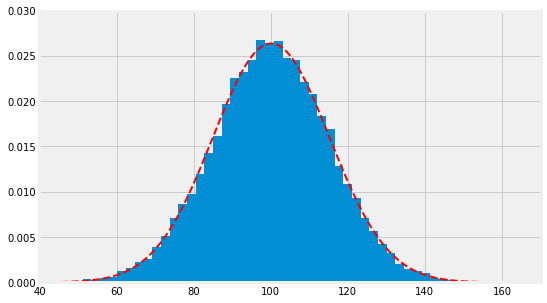

In [178]:
from sklearn.mixture import GaussianMixture

mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)

num_bins = 50

fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

n, bins, patches = ax.hist(x, num_bins, density=1)

# Add a "best-fit" line.
gmm = GaussianMixture(n_components=1)
gmm.fit(x.reshape(-1, 1))
x_new = np.arange(40, 160, 1).reshape(-1, 1)
y_pred = np.exp(gmm.score_samples(x_new))

ax.plot(x_new, y_pred, 'r--', linewidth=2)
ax.axis([40, 170, 0, 0.030])

plt.show()
plt.close()

## Image tutorial ([link](https://matplotlib.org/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py))

### Importing image data into Numpy arrays

Natively, Matplotlib only supports PNG images.
Under the hood, Matplotlib relies on the *Pillow* library for loading images.
The image used below was downloaded from the tutorial website.
It is an 8-bit image with one value per pixel representing a grayscale.
Each value of the array represents the shade of a pixel.

![](assets/Matplotlib-tutorial/stinkbug.png)

In [179]:
img = mpimg.imread(assets_path.joinpath('stinkbug.png').as_posix())
img

array([[0.40784314, 0.40784314, 0.40784314, ..., 0.42745098, 0.42745098,
        0.42745098],
       [0.4117647 , 0.4117647 , 0.4117647 , ..., 0.42745098, 0.42745098,
        0.42745098],
       [0.41960785, 0.41568628, 0.41568628, ..., 0.43137255, 0.43137255,
        0.43137255],
       ...,
       [0.4392157 , 0.43529412, 0.43137255, ..., 0.45490196, 0.4509804 ,
        0.4509804 ],
       [0.44313726, 0.44313726, 0.4392157 , ..., 0.4509804 , 0.44705883,
        0.44705883],
       [0.44313726, 0.4509804 , 0.4509804 , ..., 0.44705883, 0.44705883,
        0.44313726]], dtype=float32)

In [180]:
img.shape

(375, 500)

### Plotting Numpy arrays as images

The Numpy array can be siplayed as an image using `imshow()`.
The default colormap is *viridis*

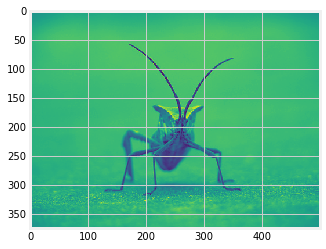

In [181]:
imgplot = plt.imshow(img)

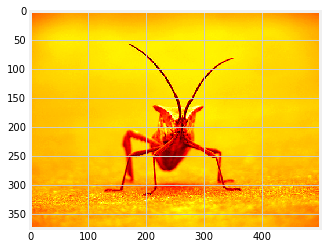

In [182]:
imgplot = plt.imshow(img, cmap='hot')

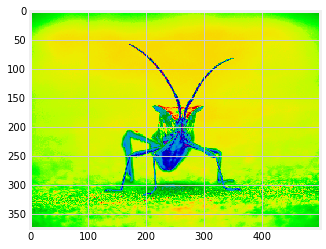

In [183]:
imgplot = plt.imshow(img)
imgplot.set_cmap('nipy_spectral')

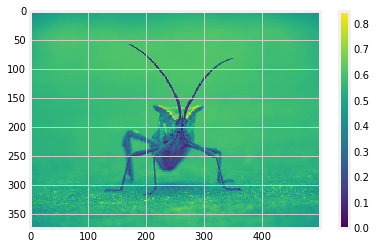

In [184]:
imgplot = plt.imshow(img)
plt.colorbar()
plt.show()

It is possible to change to limits of the colormap by "clipping" them to a range.

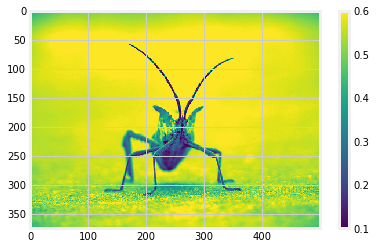

In [185]:
imgplotg = plt.imshow(img, clim=(0.1, 0.6))
plt.colorbar()
plt.show()

## The lifecycle of a plot ([link](https://matplotlib.org/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py))

This tutorial demonstrated the process of creating a full-featured figure.

### Our data

In [186]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)
data

{'Barton LLC': 109438.5,
 'Frami, Hills and Schmidt': 103569.59,
 'Fritsch, Russel and Anderson': 112214.71,
 'Jerde-Hilpert': 112591.43,
 'Keeling LLC': 100934.3,
 'Koepp Ltd': 103660.54,
 'Kulas Inc': 137351.96,
 'Trantow-Barrows': 123381.38,
 'White-Trantow': 135841.99,
 'Will LLC': 104437.6}

### Getting started

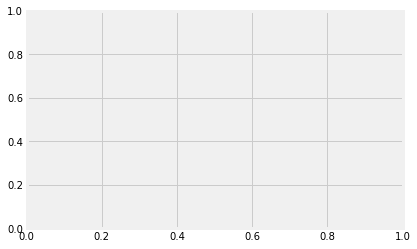

In [187]:
fig, ax = plt.subplots()

<BarContainer object of 10 artists>

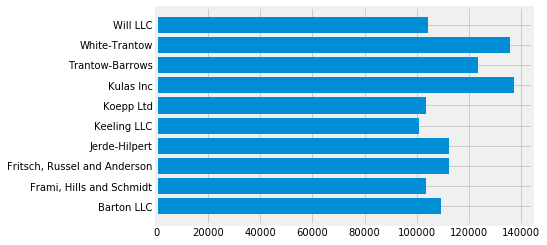

In [188]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

### Controlling the style

The following are the available plot styles.

In [189]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


They are easy to implement.

In [190]:
plt.style.use('fivethirtyeight')

<BarContainer object of 10 artists>

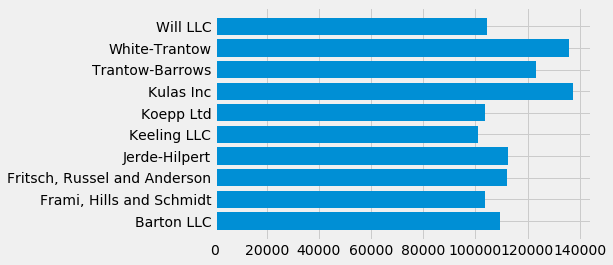

In [191]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

### Customizing the plot

The `setp()` method can set the properties of one or a list of Matplotlib objects at once.
Below, we extract the x-axis labels and rotate them and set their horizontal alignment to the right.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

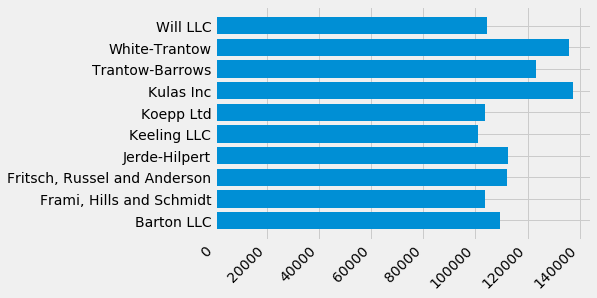

In [192]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
x_labels = ax.get_xticklabels()
plt.setp(x_labels, rotation=45, horizontalalignment='right')

We will use the OO interface of Matplotlib to add properties using the `set()` method of the `Axes` object `ax`.

[Text(0, 0.5, 'Company'),
 (-1000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

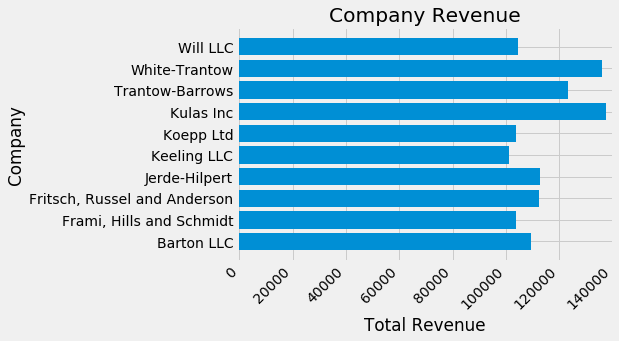

In [193]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-1000, 140000],
       xlabel='Total Revenue',
       ylabel='Company',
       title='Company Revenue')

The size of the figure can be set when the `Figure` and `Axes` objects were created.

[Text(0, 0.5, 'Company'),
 (-1000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

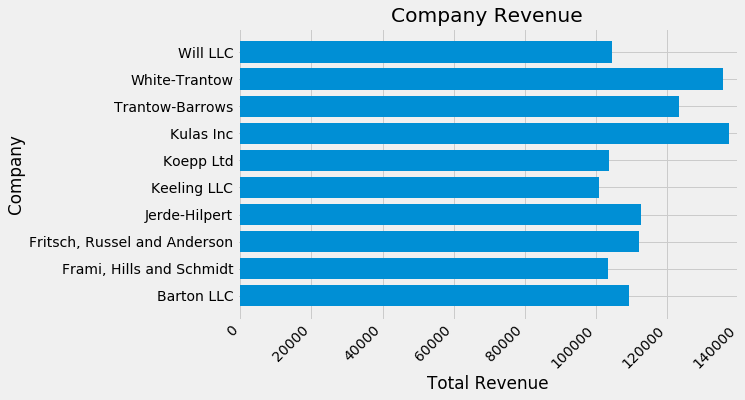

In [194]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-1000, 140000],
       xlabel='Total Revenue',
       ylabel='Company',
       title='Company Revenue')

Custom formating guidelines for labels can be created using a `FuncFormatter` object initialized with a function that returns the desired label string for a current value and position.

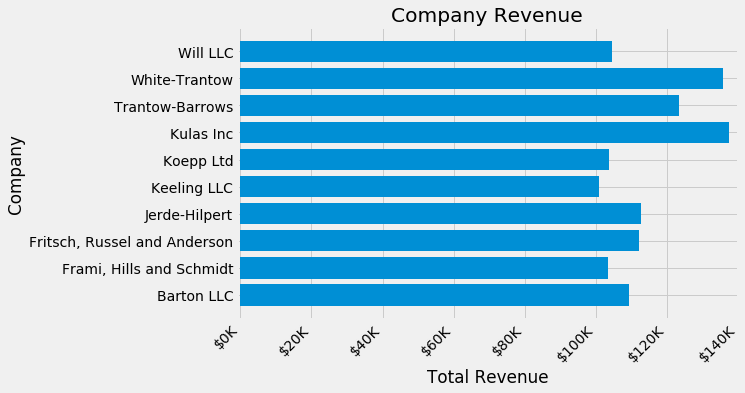

In [195]:
def currency_formatter(x, pos):
    """The two args are the value and position."""
    if x >= 1e6:
        return '${:1.1f}M'.format(x*1e-6)
    else :
        return '${:1.0f}K'.format(x*1e-3)


formatter = FuncFormatter(currency_formatter)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-1000, 140000],
       xlabel='Total Revenue',
       ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

### Combining multiple visualizations

Multiple plot elements can be drawn on the same instance of `Axes`.

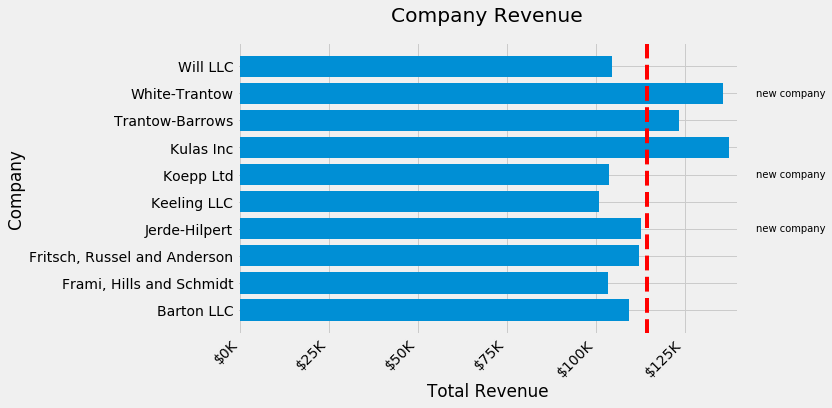

In [196]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line.
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies.
for group in [3, 5, 8]:
    ax.text(145000, group, 'new company', 
            fontsize=10, verticalalignment='center')

# Move the title up so the plot doesn't get too cramped.
ax.title.set(y=1.05)

ax.set(xlim=[-1000, 140000],
       xlabel='Total Revenue',
       ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])

plt.show()

### Saving our plot

A list of all file types that Matplotlib can save to is shown below.

In [197]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [198]:
fig.savefig(
    save_path.joinpath('the-lifecycle-of-a-plot_final-img.jpeg').as_posix(),
    transparent=False, dpi=80, bbox_inches='tight'
)

Below is the saved image rendered in a Markdown cell.

![](output/Matplotlib-tutorial/the-lifecycle-of-a-plot_final-img.jpeg)